# 2021 Day 5

https://adventofcode.com/2021/day/5

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inp = pd.read_csv('input-05.txt', sep=',| -> ', names='x1 y1 x2 y2'.split(), engine='python')
inp

,x1,y1,x2,y2
0,503,977,843,637
1,437,518,437,225
2,269,250,625,250
3,846,751,646,751
4,18,731,402,731
...,...,...,...,...
495,657,232,657,945
496,518,392,518,621
497,268,959,896,331
498,886,616,841,616


In [3]:
xmin = inp[['x1', 'x2']].min().min()
xmax = inp[['x1', 'x2']].max().max()
ymin = inp[['y1', 'y2']].min().min()
ymax = inp[['y1', 'y2']].max().max()
xmin, xmax, ymin, ymax

(10, 990, 10, 989)

## Part 1

In [4]:
field = np.zeros((xmax+1, ymax+1), dtype=int)
for row in inp.itertuples():
    x1, x2, y1, y2 = row.x1, row.x2, row.y1, row.y2
    dx, dy = abs(x2-x1), abs(y2-y1)
    if dx == 0:
        x = x1
        y1, y2 = sorted([y1, y2])
        for y in range(y1, y2+1):
            field[x,y] += 1
    elif dy == 0:
        y = y1
        x1, x2 = sorted([x1, x2])
        for x in range(x1, x2+1):
            field[x,y] += 1

5124

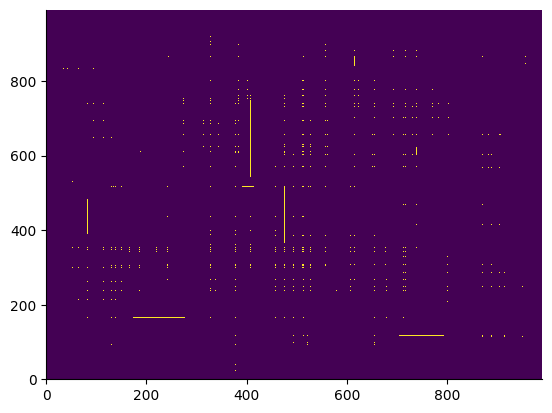

In [5]:
plt.pcolormesh(field>=2)
np.sum(field >= 2)

## Part 2

In [6]:
field = np.zeros((xmax+1, ymax+1), dtype=int)
for row in inp.itertuples():
    x1, x2, y1, y2 = row.x1, row.x2, row.y1, row.y2
    dx, dy = abs(x2-x1), abs(y2-y1)
    if dx == 0:
        x = x1
        y1, y2 = sorted([y1, y2])
        for y in range(y1, y2+1):
            field[x,y] += 1
    elif dy == 0:
        y = y1
        x1, x2 = sorted([x1, x2])
        for x in range(x1, x2+1):
            field[x,y] += 1
    elif dx == dy:
        xs = np.linspace(x1, x2, np.abs(dx)+1).astype(int)
        ys = np.linspace(y1, y2, np.abs(dy)+1).astype(int)
        for (x,y) in zip(xs, ys):
            field[x,y] += 1

19771

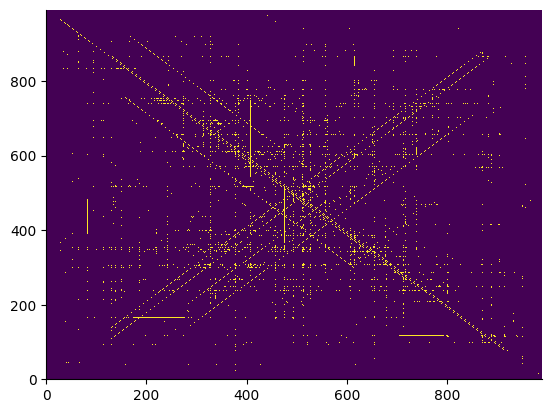

In [7]:
plt.pcolormesh(field>=2)
np.sum(field >= 2)